**Survival Analysis with R**

Packages used: survival,ggplot2,ggfortify and ranger.

survival(&Surv()*): basic survival analysis data structure in R

ggfortify(*ggplot2::autoplot*): enables producing beautiful, one-line survival plots 

ranger(*ranger()*): suitable for building time-to-event models with the large, high-dimensional data sets 

dataset:vetarn{survival}

In [1]:
#loading the packages
library("survival")
library("ggfortify")
library("ggplot2")
library("ranger")
library("dplyr")

Loading required package: ggplot2

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
#loading inbuilt dataset
data(veteran)
head(veteran)

attach(veteran)

trt,celltype,time,status,karno,diagtime,age,prior
1,squamous,72,1,60,7,69,0
1,squamous,411,1,70,5,64,10
1,squamous,228,1,60,3,38,0
1,squamous,126,1,60,9,63,10
1,squamous,118,1,70,11,65,10
1,squamous,10,1,20,5,49,0


veteran are:
*trt*: 1=standard 2=test 

*celltype*: 1=squamous, 2=small cell, 3=adeno, 4=large

*time*: survival time in days

*status*: censoring status

*karno*: Karnofsky performance score (100=good)

*diagtime*: months from diagnosis to randomization 

*age*: in years 

*prior*: prior therapy 0=no, 10=yes

In [3]:
#structure of the data
glimpse(veteran)

Observations: 137
Variables: 8
$ trt      <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1...
$ celltype <fct> squamous, squamous, squamous, squamous, squamous, squamous...
$ time     <dbl> 72, 411, 228, 126, 118, 10, 82, 110, 314, 100, 42, 8, 144,...
$ status   <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1...
$ karno    <dbl> 60, 70, 60, 60, 70, 20, 40, 80, 50, 70, 60, 40, 30, 80, 70...
$ diagtime <dbl> 7, 5, 3, 9, 11, 5, 10, 29, 18, 6, 4, 58, 4, 9, 11, 3, 9, 2...
$ age      <dbl> 69, 64, 38, 63, 65, 49, 69, 68, 43, 70, 81, 63, 63, 52, 48...
$ prior    <dbl> 0, 10, 0, 10, 10, 0, 10, 0, 0, 0, 0, 10, 0, 10, 10, 0, 0, ...


**Kaplan Meier Analysis**

Surv() - used to build the standard survival object.

The variables *time* rescords survival time, *status* indicates whether the patient's death was observed(status = 1) or that survival time was censored(status = 0)

NOTE:**a “+” after the time in the print out of kaplan meier indicates censoring**

In [5]:
km <- with(veteran,Surv(time, status))
head(km,80)

 [1]  72  411  228  126  118   10   82  110  314  100+  42    8  144   25+  11 
[16]  30  384    4   54   13  123+  97+ 153   59  117   16  151   22   56   21 
[31]  18  139   20   31   52  287   18   51  122   27   54    7   63  392   10 
[46]   8   92   35  117  132   12  162    3   95  177  162  216  553  278   12 
[61] 260  200  156  182+ 143  105  103  250  100  999  112   87+ 231+ 242  991 
[76] 111    1  587  389   33 

*Surv(futime, status) ~ 1* and the *survfit()* function produce the Kaplan-Meier estimates of the probability of survival over time.

The *time* parameter of the *summary()* function gives some control which times to print.In this situation,it is set to print the estimates for **1,30,60 and 90 days and,then every 90 days thereafter.**

In [6]:
km_fit <- survfit(formula = Surv(time,status) ~ 1, data = veteran)
summary(km_fit,times = c(1,30,60,90*(1:10)))

Call: survfit(formula = Surv(time, status) ~ 1, data = veteran)

 time n.risk n.event survival std.err lower 95% CI upper 95% CI
    1    137       2    0.985  0.0102      0.96552       1.0000
   30     97      39    0.700  0.0392      0.62774       0.7816
   60     73      22    0.538  0.0427      0.46070       0.6288
   90     62      10    0.464  0.0428      0.38731       0.5560
  180     27      30    0.222  0.0369      0.16066       0.3079
  270     16       9    0.144  0.0319      0.09338       0.2223
  360     10       6    0.090  0.0265      0.05061       0.1602
  450      5       5    0.045  0.0194      0.01931       0.1049
  540      4       1    0.036  0.0175      0.01389       0.0934
  630      2       2    0.018  0.0126      0.00459       0.0707
  720      2       0    0.018  0.0126      0.00459       0.0707
  810      2       0    0.018  0.0126      0.00459       0.0707
  900      2       0    0.018  0.0126      0.00459       0.0707

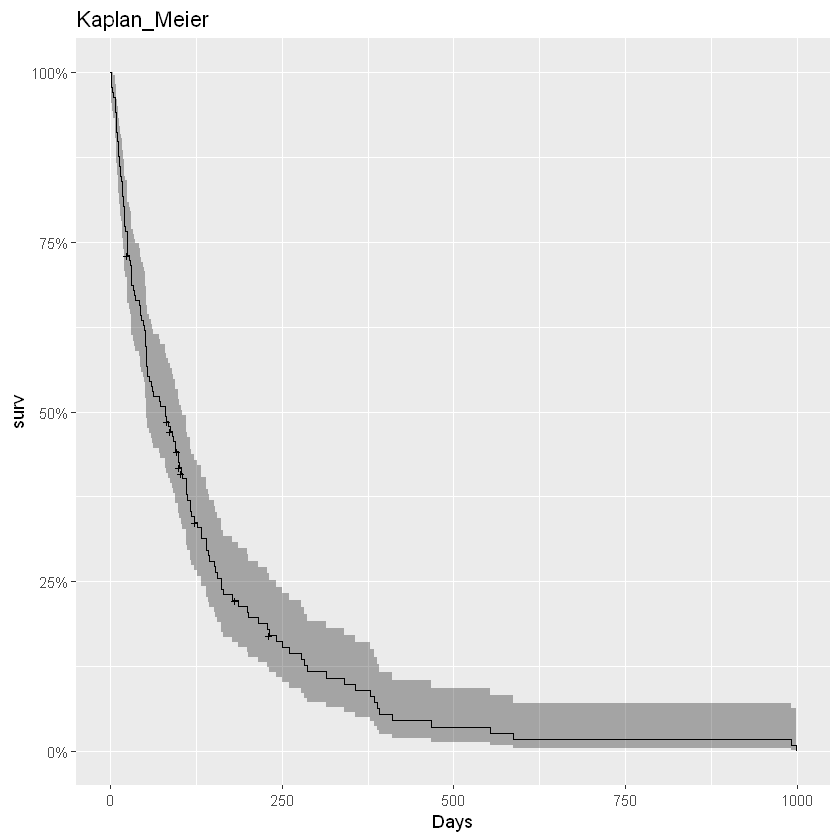

In [7]:
#plot(km_fit){base},survival by days
autoplot(km_fit,xlab = "Days",main = "Kaplan_Meier")

Call: survfit(formula = Surv(time, status) ~ trt, data = veteran)

                trt=1 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
    3     69       1   0.9855  0.0144      0.95771        1.000
    4     68       1   0.9710  0.0202      0.93223        1.000
    7     67       1   0.9565  0.0246      0.90959        1.000
    8     66       2   0.9275  0.0312      0.86834        0.991
   10     64       2   0.8986  0.0363      0.83006        0.973
   11     62       1   0.8841  0.0385      0.81165        0.963
   12     61       2   0.8551  0.0424      0.77592        0.942
   13     59       1   0.8406  0.0441      0.75849        0.932
   16     58       1   0.8261  0.0456      0.74132        0.921
   18     57       2   0.7971  0.0484      0.70764        0.898
   20     55       1   0.7826  0.0497      0.69109        0.886
   21     54       1   0.7681  0.0508      0.67472        0.874
   22     53       1   0.7536  0.0519      0.65851        0.862
   27     51  

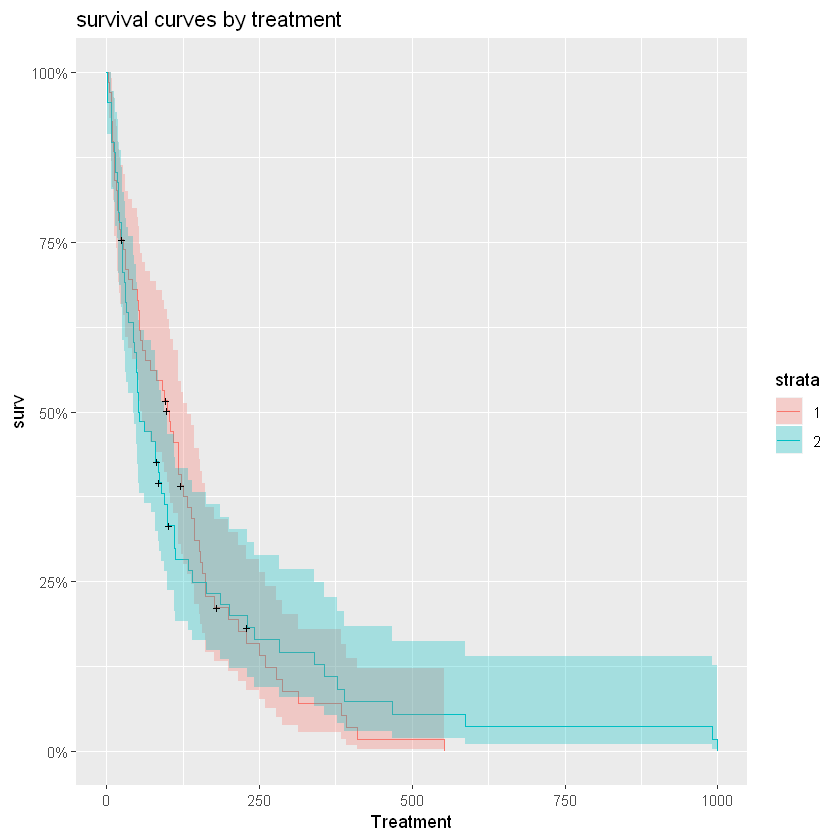

In [8]:
#survival curves by treatment
km_trt_fit <- survfit(Surv(time, status) ~ trt, data = veteran)

summary(km_trt_fit)

autoplot(km_trt_fit,xlab = "Treatment",main = "survival curves by treatment")

**Survival by age**

Data munging to make age a categorical variable *AG* that has values *LT60* and *OV60*, which respectively describe veterans younger and older than 60. 

*trt* and *prior* converted into factors


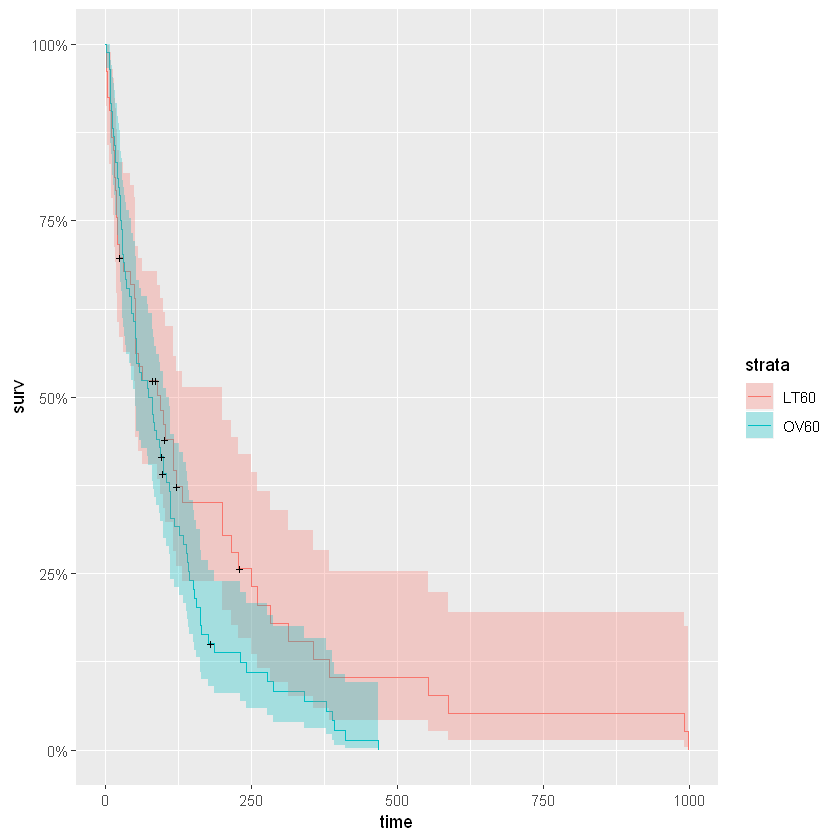

In [9]:
vet <-  mutate(veteran, AG = ifelse((age < 60), "LT60", "OV60"),
              AG = factor(AG),
              trt = factor(trt,labels = c("standard", "test")),
              prior = factor(prior, labels = c("No","Yes")))

km_AG_fit <- survfit(Surv(time,status) ~ AG, data =vet)
autoplot(km_AG_fit)

The two curves appear to overlap in the first fifty days, younger patients have a better chance of surviving more than a year.

Cox Proportional Hazards Model

uses all the covariates in the dataset.

In [10]:
#fit cox model
cox <-  coxph(Surv(time,status) ~ trt + celltype + karno + diagtime+
             age + prior, data = vet)
summary(cox)

Call:
coxph(formula = Surv(time, status) ~ trt + celltype + karno + 
    diagtime + age + prior, data = vet)

  n= 137, number of events= 128 

                        coef  exp(coef)   se(coef)      z Pr(>|z|)    
trttest            2.946e-01  1.343e+00  2.075e-01  1.419  0.15577    
celltypesmallcell  8.616e-01  2.367e+00  2.753e-01  3.130  0.00175 ** 
celltypeadeno      1.196e+00  3.307e+00  3.009e-01  3.975 7.05e-05 ***
celltypelarge      4.013e-01  1.494e+00  2.827e-01  1.420  0.15574    
karno             -3.282e-02  9.677e-01  5.508e-03 -5.958 2.55e-09 ***
diagtime           8.132e-05  1.000e+00  9.136e-03  0.009  0.99290    
age               -8.706e-03  9.913e-01  9.300e-03 -0.936  0.34920    
priorYes           7.159e-02  1.074e+00  2.323e-01  0.308  0.75794    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

                  exp(coef) exp(-coef) lower .95 upper .95
trttest              1.3426     0.7448    0.8939    2.0166
celltypesmallcell    2.3669    

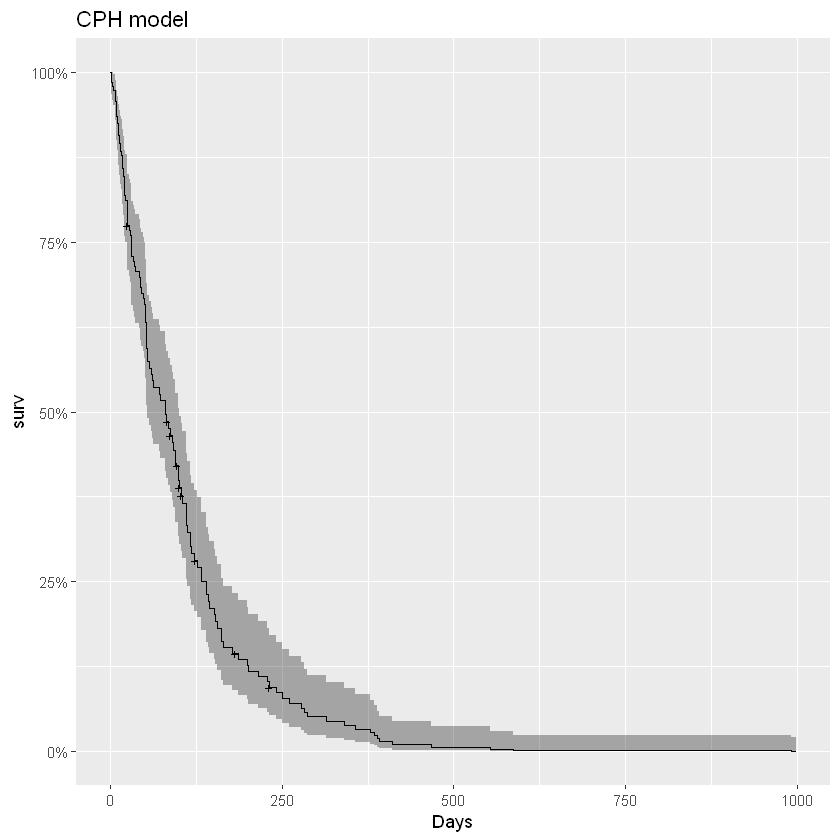

In [12]:
cox_fit <- survfit(cox)

autoplot(cox_fit, xlab = "Days", main = "CPH model")

The model shows small cell type,adeno cell type and karno as significant

Cox model assumes that the covariates do not vary with time. In a *vignette* that accompanies the **survival** package  Therneau, Crowson and Atkinson demonstrate that the Karnofsky score (karno) is, in fact, time-dependent so the assumptions for the Cox model are not met. 

**Assessing model performance**

Concordance statistic:
survConcordance() function{survival} defined as the probability of agreement for any two randomly chosen observation, agreement in this case means that the observation with the shorter survival time of the two also has the larger risk score.The predictor(or risk score) will often will be result of a Cox model or other regression.

NOTE:
**"for continuous covariates concordance is equivalent to Kendall's tau,and for logistic regression is equivalent to area under the ROC curve."**

To demonstrate using the *survival* package, along with *ggplot2* and *ggfortify*,fit Aalen’s additive regression model for censored data to the veteran data. The documentation states: “The Aalen model assumes that the cumulative hazard H(t) for a subject can be expressed as a(t) + X B(t), where a(t) is a time-dependent intercept term, X is the vector of covariates for the subject (possibly time-dependent), and B(t) is a time-dependent matrix of coefficients.”

In [14]:
#fit aalen model
aa_fit <- aareg(Surv(time,status) ~ trt + celltype +
                 karno + diagtime + age + prior , 
                 data = vet)
aa_fit

summary(aa_fit)

Call:
aareg(formula = Surv(time, status) ~ trt + celltype + karno + 
    diagtime + age + prior, data = vet)

  n= 137 
    75 out of 97 unique event times used

                      slope      coef se(coef)      z        p
Intercept          0.083400  3.81e-02 1.09e-02  3.490 4.79e-04
trttest            0.006730  2.49e-03 2.58e-03  0.967 3.34e-01
celltypesmallcell  0.015000  7.30e-03 3.38e-03  2.160 3.09e-02
celltypeadeno      0.018400  1.03e-02 4.20e-03  2.450 1.42e-02
celltypelarge     -0.001090 -6.21e-04 2.71e-03 -0.229 8.19e-01
karno             -0.001180 -4.37e-04 8.77e-05 -4.980 6.28e-07
diagtime          -0.000243 -4.92e-05 1.64e-04 -0.300 7.65e-01
age               -0.000246 -6.27e-05 1.28e-04 -0.491 6.23e-01
priorYes           0.003300  1.54e-03 2.86e-03  0.539 5.90e-01

Chisq=41.62 on 8 df, p=1.6e-06; test weights=aalen

$table
                          slope          coef     se(coef)          z
Intercept          0.0834340087  3.807658e-02 1.090360e-02  3.4921114
trttest            0.0067346942  2.494101e-03 2.579635e-03  0.9668426
celltypesmallcell  0.0150155271  7.300549e-03 3.381821e-03  2.1587627
celltypeadeno      0.0184104066  1.028376e-02 4.195521e-03  2.4511281
celltypelarge     -0.0010918822 -6.210722e-04 2.711566e-03 -0.2290455
karno             -0.0011833856 -4.368915e-04 8.768774e-05 -4.9823553
diagtime          -0.0002426408 -4.919161e-05 1.642118e-04 -0.2995620
age               -0.0002459319 -6.273564e-05 1.277592e-04 -0.4910458
priorYes           0.0032957829  1.538811e-03 2.856993e-03  0.5386122
                             p
Intercept         4.792184e-04
trttest           3.336227e-01
celltypesmallcell 3.086858e-02
celltypeadeno     1.424093e-02
celltypelarge     8.188335e-01
karno             6.281497e-07
diagtime          7.645112e-01
age               6.233941e-01
priorYes      

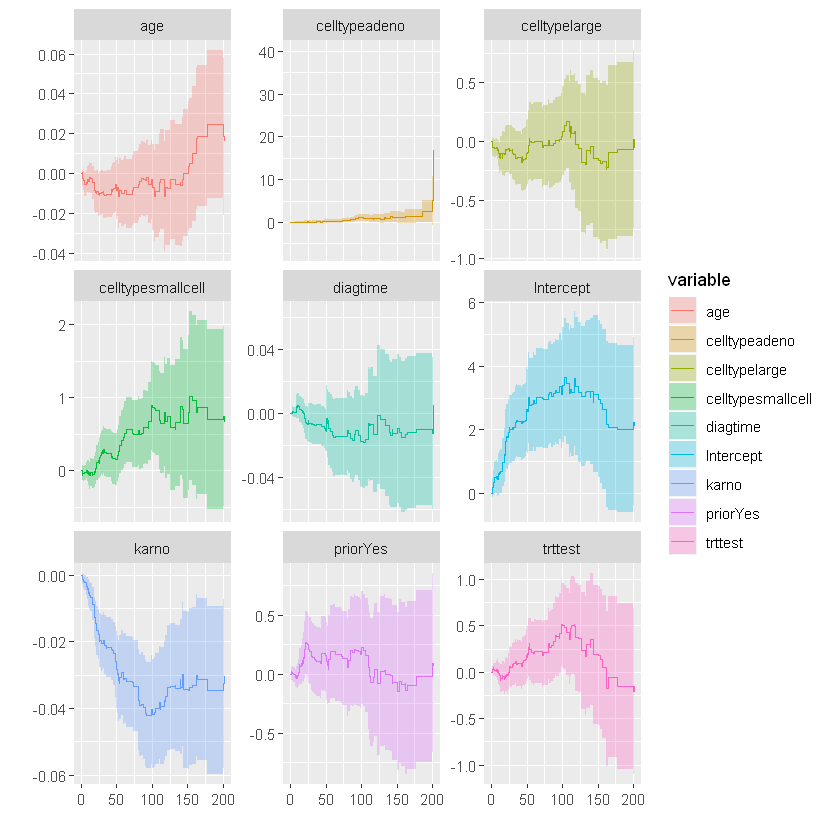

In [15]:
#plots showing the effects of the covariates change over time.
autoplot(aa_fit)

**Random Forest Model**

use the *ranger()* function to fit a Random Forests Ensemble model to the data.

It builds a model for each observation in the dataset.

It also plots 20 random curves, along with a curve respresenting the global average for all of the patients{base R graphics used here).

In [18]:
#ranger model
r_fit <- ranger(Surv(time, status) ~ trt + celltype + 
                     karno + diagtime + age + prior,
                     data = vet,
                     mtry = 4,
                     importance = "permutation",
                     splitrule = "extratrees",
                     verbose = TRUE)
r_fit
summary(r_fit)

Ranger result

Call:
 ranger(Surv(time, status) ~ trt + celltype + karno + diagtime +      age + prior, data = vet, mtry = 4, importance = "permutation",      splitrule = "extratrees", verbose = TRUE) 

Type:                             Survival 
Number of trees:                  500 
Sample size:                      137 
Number of independent variables:  6 
Mtry:                             4 
Target node size:                 3 
Variable importance mode:         permutation 
Splitrule:                        extratrees 
Number of unique death times:     101 
OOB prediction error (1-C):       0.2994094 

                          Length Class         Mode     
num.trees                     1  -none-        numeric  
num.independent.variables     1  -none-        numeric  
unique.death.times          101  -none-        numeric  
mtry                          1  -none-        numeric  
min.node.size                 1  -none-        numeric  
variable.importance           6  -none-        numeric  
prediction.error              1  -none-        numeric  
forest                       11  ranger.forest list     
chf                       13837  -none-        numeric  
survival                  13837  -none-        numeric  
splitrule                     1  -none-        character
treetype                      1  -none-        character
call                          7  -none-        call     
importance.mode               1  -none-        character
num.samples                   1  -none-        numeric  
replace                       1  -none-        logical  

In [17]:
# Average the survival models
death_times <- r_fit$unique.death.times
death_times
surv_prob <- data.frame(r_fit$survival)
surv_prob 
avg_prob <- sapply(surv_prob,mean)
avg_prob

[1]   1   2   3   4   7   8  10  11  12  13  15  16  18  19  20  21  22  24
 [19]  25  27  29  30  31  33  35  36  42  43  44  45  48  49  51  52  53  54
 [37]  56  59  61  63  72  73  80  82  83  84  87  90  92  95  97  99 100 103
 [55] 105 110 111 112 117 118 122 123 126 132 133 139 140 143 144 151 153 156
 [73] 162 164 177 182 186 200 201 216 228 231 242 250 260 278 283 287 314 340
 [91] 357 378 384 389 392 411 467 553 587 991 999

X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101
0.9951958,0.9951958,0.9951958,0.9951958,0.9818396,0.9800625,0.9713132,0.9643200,0.9580514,0.9467933,...,0.2569509,0.2527955,0.2500626,0.2446851,0.2355512,0.2323725,0.2298604,0.2028511,0.2028511,0.2028511
0.9992322,0.9992322,0.9992322,0.9992322,0.9992322,0.9895582,0.9751227,0.8823927,0.8679635,0.8679635,...,0.2457475,0.2457475,0.2441015,0.2441015,0.2441015,0.2406268,0.2380533,0.2355073,0.2153995,0.2142446
0.9702528,0.9702528,0.9590273,0.9221012,0.9178744,0.9144903,0.8970073,0.8713393,0.8713393,0.8515901,...,0.2752500,0.2523696,0.2512521,0.2468314,0.2354193,0.2331090,0.2263133,0.1940419,0.1906278,0.1906278
0.9960675,0.9960675,0.9960675,0.9960675,0.9960675,0.9606842,0.9512581,0.9093423,0.8824032,0.8818040,...,0.2820846,0.2775226,0.2775226,0.2775226,0.2139145,0.2127551,0.2127551,0.2070515,0.1918820,0.1908420
0.9942382,0.9942382,0.9942382,0.9942382,0.9942382,0.9775802,0.9671749,0.8595203,0.8509406,0.8509406,...,0.3376698,0.3376698,0.3371959,0.3371959,0.2161157,0.2137010,0.2125038,0.2125038,0.1961363,0.1896352
0.9477797,0.9434020,0.8962093,0.8845263,0.8351436,0.7949913,0.7935205,0.7898553,0.7872268,0.7854139,...,0.1902467,0.1902467,0.1898244,0.1856526,0.1846240,0.1842825,0.1802325,0.1772535,0.1772535,0.1772535
0.9654410,0.9469772,0.9469772,0.9439350,0.9338814,0.8023651,0.7171152,0.7064324,0.5602573,0.5602573,...,0.2046280,0.2046280,0.2046280,0.1981324,0.1803410,0.1803410,0.1803410,0.1803410,0.1793740,0.1793740
0.9988895,0.9952889,0.9952889,0.9950915,0.9941798,0.9701314,0.9664811,0.9522621,0.9469864,0.9467760,...,0.2468149,0.2468149,0.2404983,0.2391659,0.2237414,0.2158059,0.2158059,0.2158059,0.2158059,0.2122390
0.9471648,0.9366418,0.9286137,0.9012185,0.8897731,0.8725858,0.8310072,0.8171970,0.8136873,0.8136873,...,0.2284373,0.2186136,0.2186136,0.2150396,0.2150396,0.2150396,0.2150396,0.2072103,0.2049457,0.2049457
0.9976685,0.9976685,0.9976685,0.9974589,0.9856394,0.9843884,0.9723031,0.9443851,0.9397145,0.9394934,...,0.2093607,0.2081328,0.2043918,0.2031930,0.1699875,0.1645760,0.1616971,0.1579369,0.1570106,0.1570106


X1        X2        X3        X4        X5        X6        X7        X8 
0.9866828 0.9794962 0.9728268 0.9653056 0.9435232 0.9176428 0.9043998 0.8971055 
       X9       X10       X11       X12       X13       X14       X15       X16 
0.8832297 0.8684754 0.8544040 0.8472479 0.8256427 0.8142413 0.8005521 0.7852023 
      X17       X18       X19       X20       X21       X22       X23       X24 
0.7777205 0.7636383 0.7435046 0.7348603 0.7275946 0.7102618 0.6961130 0.6885430 
      X25       X26       X27       X28       X29       X30       X31       X32 
0.6816613 0.6742563 0.6692028 0.6630488 0.6565286 0.6499142 0.6442868 0.6378722 
      X33       X34       X35       X36       X37       X38       X39       X40 
0.6175921 0.5972553 0.5903005 0.5757078 0.5698611 0.5626404 0.5552575 0.5488683 
      X41       X42       X43       X44       X45       X46       X47       X48 
0.5421605 0.5345167 0.5214105 0.5145873 0.5145873 0.5092651 0.5031609 0.4969932 
      X49       X50       X51       X52       X53       X54       X55       X56 
0.4908627 0.4774706 0.4774706 0.4637819 0.4595756 0.4537482 0.4483680 0.4425469 
      X57       X58       X59       X60       X61       X62       X63       X64 
0.4277468 0.4202313 0.4076732 0.3996067 0.3943562 0.3943562 0.3867584 0.3801882 
      X65       X66       X67       X68       X69       X70       X71       X72 
0.3749516 0.3672126 0.3603258 0.3557028 0.3496326 0.3428973 0.3377515 0.3326901 
      X73       X74       X75       X76       X77       X78       X79       X80 
0.3195701 0.3145614 0.3096472 0.3096472 0.3040585 0.2987019 0.2931618 0.2884452 
      X81       X82       X83       X84       X85       X86       X87       X88 
0.2837586 0.2789677 0.2732428 0.2681770 0.2615179 0.2563014 0.2516554 0.2477333 
      X89       X90       X91       X92       X93       X94       X95       X96 
0.2431613 0.2383391 0.2326623 0.2271920 0.2216510 0.2163643 0.2111522 0.2058646 
      X97       X98       X99      X100      X101 
0.2001572 0.1954036 0.1895842 0.1841287 0.1799460

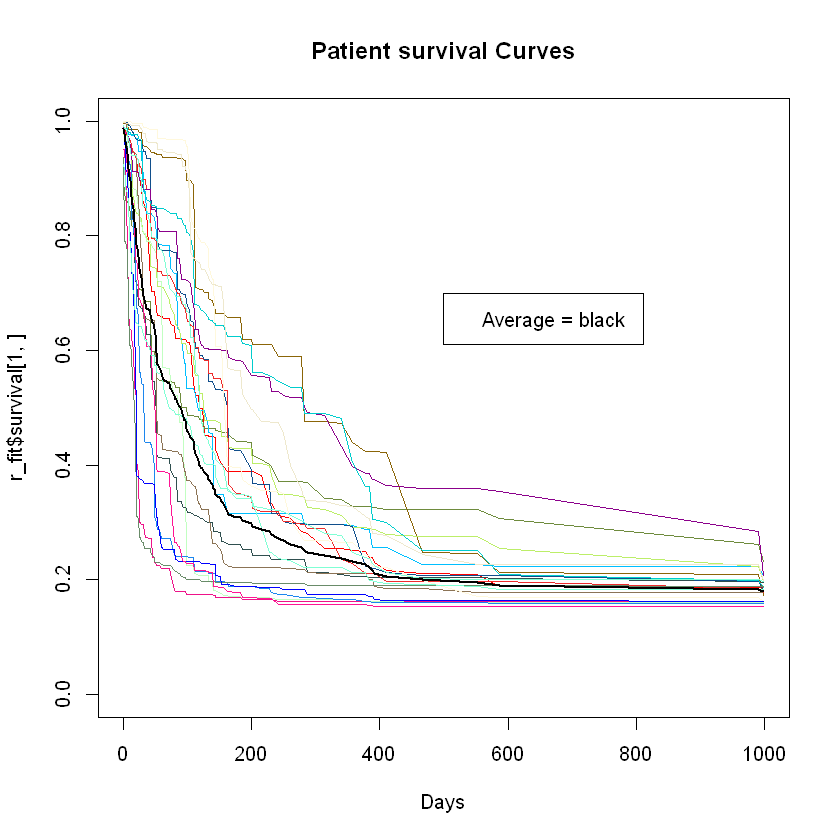

In [19]:
#plot the survival models for each patient
plot(r_fit$unique.death.times,r_fit$survival[1,],
    type = "l",
    ylim = c(0,1),
    col = "red",
    xlab = "Days",
    main = "Patient survival Curves")
cols <- colors()
for (n in sample(c(2:dim(vet)[1]),20)){
    lines(r_fit$unique.death.times, r_fit$survival[n,], type = "l", col = cols[n])
}
lines(death_times,avg_prob,lwd = 2)
legend(500, 0.7,legend = c("Average = black"))

In [20]:
#how ranger() ranks variable importance
vi <- data.frame(sort(round(r_fit$variable.importance, 4), decreasing = TRUE))
names(vi) <- "importance"
head(vi)


,importance
karno,0.0897
celltype,0.0327
diagtime,0.0028
trt,0.0009
prior,-0.0012
age,-0.0031


ranger() flags karno and celltype as the two most important; the same variables with the smallest p-values in the Cox model. 

Also note that the importance results just give variable names and not level names. This is because ranger and other tree models do not usually create dummy variables.

But ranger() does compute Harrell’s c-index, which is similar to the Concordance statistic described above. This is a generalization of the ROC curve, which reduces to the Wilcoxon-Mann-Whitney statistic for binary variables, which in turn, is equivalent to computing the area under the ROC curve.

the major use for tree-based models for survival data will be to deal with very large data sets.

In [21]:
cat("Prediction Error = 1 - Harrell's c-index = ", r_fit$prediction.error)

Prediction Error = 1 - Harrell's c-index =  0.2994094

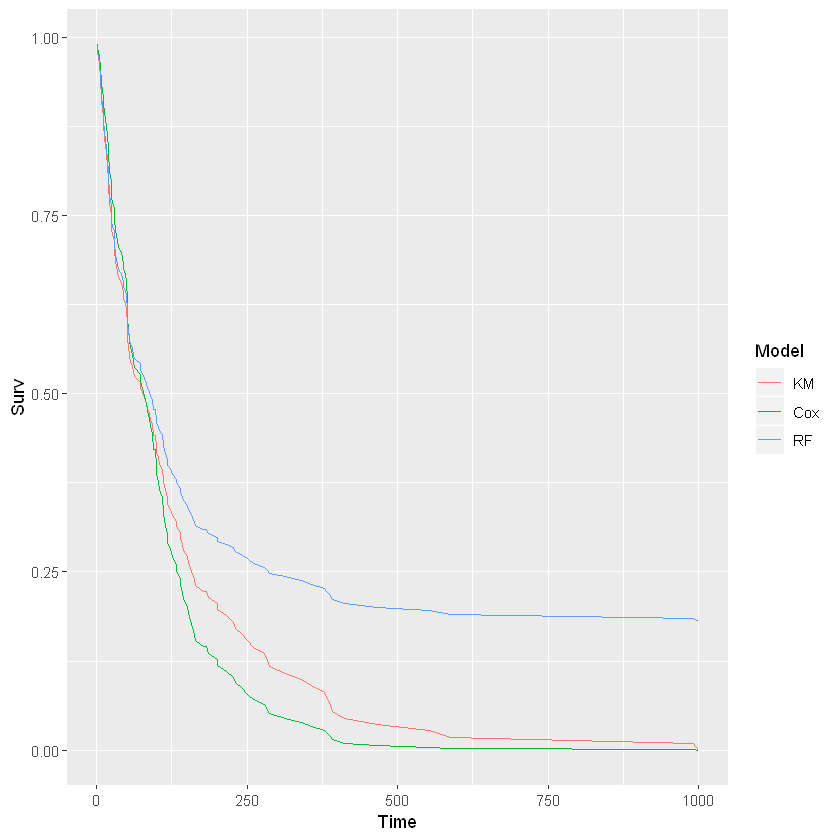

In [22]:
#set up for ggplot
kmi <- rep("KM",length(km_fit$time))
km_df <- data.frame(km_fit$time,km_fit$surv,kmi)
names(km_df) <- c("Time","Surv","Model")

coxi <- rep("Cox",length(cox_fit$time))
cox_df <- data.frame(cox_fit$time,cox_fit$surv,coxi)
names(cox_df) <- c("Time","Surv","Model")

rfi <- rep("RF",length(r_fit$unique.death.times))
rf_df <- data.frame(r_fit$unique.death.times,avg_prob,rfi)
names(rf_df) <- c("Time","Surv","Model")

plot_df <- rbind(km_df,cox_df,rf_df)

p <- ggplot(plot_df,aes(x = Time, y = Surv, color = Model))
p + geom_line()


Author: Lucy Njoki

Acknowlegement: **Joseph Rickert**
